Load the video

In [2]:
import cv2
import numpy as np
from perfectswish.image_transformation.image_processing import transform_board
from perfectswish.object_detection.detect_cuestick import CuestickDetector
from perfectswish.object_detection.detect_balls import remove_green

In [6]:
rect = [(36, 931), (60, 79), (1754, 108), (1735, 970)]

In [4]:
import matplotlib.pyplot as plt
def show_im(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

[[ 137 1403]
 [  82 1402]
 [  85 1345]
 [ 140 1346]]


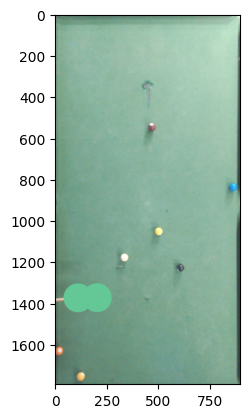

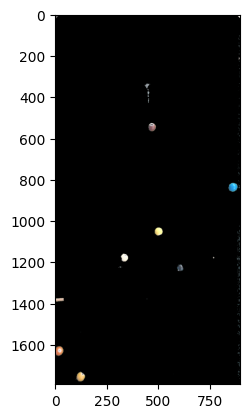

In [5]:
cap = cv2.VideoCapture('detect_objects_test_images/fiducials_2.mp4')

fiducial_detector = CuestickDetector(back_fiducial_id=3, front_fiducial_id=4)

for i in range(11):
    ret, test_frame = cap.read()

cropped_frame = transform_board(test_frame, rect)
cuestick = fiducial_detector.detect_cuestick(cropped_frame, return_corners=True)
if cuestick is not None:
    stickend, back_fiducial_center, front_fiducial_center, corners = cuestick

    # draw a filled polygon on the fiducials to remove them
    print(np.int32(corners[0][0]))
    
    cv2.circle(cropped_frame, tuple(np.int32(back_fiducial_center)), 70, (150, 200, 100), -1)
    cv2.circle(cropped_frame, tuple(np.int32(front_fiducial_center)), 70, (150, 200, 100), -1)
    # cv2.fillPoly(cropped_frame, np.int32(corners[0][0]), (0, 0, 0))

show_im(cropped_frame)
show_im(remove_green(cropped_frame))

